In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv("C:/Users/ASUS/train.csv")
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
df_train.groupby(['Pclass']).mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7492\3689284555.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby(['Pclass']).mean()


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [11]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
df_train_dummied = pd.get_dummies(df_train, columns=["Sex"])

In [15]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=["Embarked"])

In [16]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<Axes: >

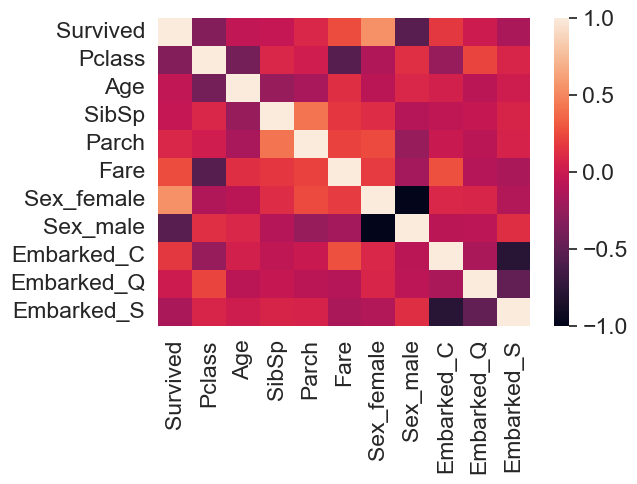

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [20]:
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [23]:
LogReg = LogisticRegression()

In [24]:
LogReg.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = LogReg.predict(X_test)

In [26]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [28]:
len(X_test)

267

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [30]:
LogReg.coef_

array([[-1.05334946, -0.03972865, -0.2395489 , -0.03084741,  1.21683548,
        -1.17572502,  0.36423354, -0.01421731, -0.30890577]])

In [31]:
LogReg.intercept_

array([3.64735655])

In [32]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
LogReg.predict_proba(X_test)

array([[0.26534776, 0.73465224],
       [0.39381416, 0.60618584],
       [0.94805848, 0.05194152],
       [0.25840638, 0.74159362],
       [0.94337231, 0.05662769],
       [0.13332374, 0.86667626],
       [0.33623403, 0.66376597],
       [0.51541204, 0.48458796],
       [0.78073704, 0.21926296],
       [0.41040461, 0.58959539],
       [0.73807181, 0.26192819],
       [0.21041693, 0.78958307],
       [0.7495294 , 0.2504706 ],
       [0.14433678, 0.85566322],
       [0.86661474, 0.13338526],
       [0.3725699 , 0.6274301 ],
       [0.89395926, 0.10604074],
       [0.29745607, 0.70254393],
       [0.17433174, 0.82566826],
       [0.39399153, 0.60600847],
       [0.90624625, 0.09375375],
       [0.55053836, 0.44946164],
       [0.86437644, 0.13562356],
       [0.93665844, 0.06334156],
       [0.51124866, 0.48875134],
       [0.51867185, 0.48132815],
       [0.03836134, 0.96163866],
       [0.8711406 , 0.1288594 ],
       [0.89938041, 0.10061959],
       [0.32378338, 0.67621662],
       [0.